<h2>Quiz 1 : Pivoting and Melting</h2>

Jelaskan itu pivoting dan melting data

jawaban :
- pivoting merupakan pengubahan bentuk data dimana baris berubah menjadi kolom
- melting merupakan pengubahan bentuk data dimana kolom berubah menjadi baris


<h2>Quiz 2 : Data structure Comprehension</h2>

Data yang rapi adalah :
1. Setiap row menunjukan suatu unit observasi
2. Setiap column merupakan suatu unit variable

Bagaimana pun, dalam menentukan unit observasi itu tergantung dari kasus yang di hadapi. sebagai seorang data scientist pasti akan menemukan berbagai bentuk struktur data. adalah sangat penting bagi seorang data scientist untuk dapat memahami dan menjelaskan setiap struktur data. Kemampuan memahami hubungan antara index baris, column dan isi data adalah kunci untuk memahami informasi apa yang data sedang beritahukan kepada kita.

Di bawah ini terdapat 2 data yang berisi sama, tetapi memiliki struktur yang berbeda. Jelaskan perbedaan dari 2 struktur data tersebut

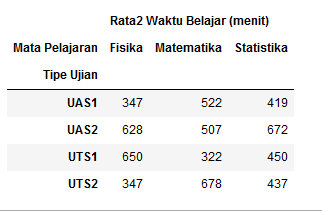

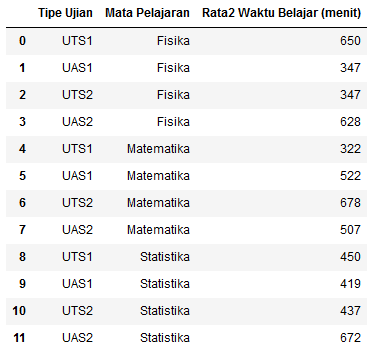

Data  merupakan data yang tidak rapi, dikarenakan unsur kolom tidak merepresentasikan variabel. Sedangkan data kedua, baris dan kolomnya merepresentasikan nilai yang akan dianalisa dengan jelas

<h2>Quiz 3 : Reshaping Data 1</h2>

In [1]:
import pandas as pd
import random

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1', 'UTS2', 'UAS2']*3,
    'Mata Pelajaran' : ['Fisika']*4 + ['Matematika']*4+['Statistika']*4,
    'Rata2 Waktu Belajar (menit)' : [random.choice(range(200, 800)) for i in range(12)],
    'Rata2 Nilai Ujian' : [random.choice(range(40, 100)) for i in range(12)] 
}
df = pd.DataFrame(data)
df

Tipe Ujian Mata Pelajaran  Rata2 Waktu Belajar (menit)  Rata2 Nilai Ujian
0        UTS1         Fisika                          444                 52
1        UAS1         Fisika                          674                 88
2        UTS2         Fisika                          493                 86
3        UAS2         Fisika                          343                 81
4        UTS1     Matematika                          792                 75
5        UAS1     Matematika                          299                 54
6        UTS2     Matematika                          521                 96
7        UAS2     Matematika                          422                 95
8        UTS1     Statistika                          241                 51
9        UAS1     Statistika                          619                 77
10       UTS2     Statistika                          486                 91
11       UAS2     Statistika                          770                 89

Perhatikan data di atas, kemudian ubahlah bentuknya agar sesuai yang di harapkan.

In [6]:
# code here
reshaped_data = df.pivot_table(values = ['Rata2 Waktu Belajar (menit)','Rata2 Nilai Ujian'], index = 'Tipe Ujian', columns = 'Mata Pelajaran')
reshaped_data

Rata2 Nilai Ujian                        \
Mata Pelajaran            Fisika Matematika Statistika   
Tipe Ujian                                               
UAS1                          88         54         77   
UAS2                          81         95         89   
UTS1                          52         75         51   
UTS2                          86         96         91   

               Rata2 Waktu Belajar (menit)                        
Mata Pelajaran                      Fisika Matematika Statistika  
Tipe Ujian                                                        
UAS1                                   674        299        619  
UAS2                                   343        422        770  
UTS1                                   444        792        241  
UTS2                                   493        521        486

Expected Result :

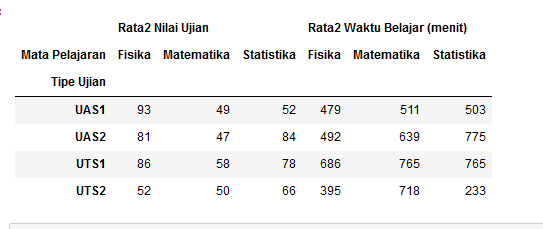

<h2>Quiz 4 : Reshaping Data 2</h2>

In [41]:
import pandas as pd

data = {
    'Hari' : ['Sabtu', 'Minggu'],
    'Kebun Binatang' : [271, 399],
    'Dufan' : [501, 700],
    'Disney' : [1000, 1001],
    'Bali' : [900, 803]
}
df = pd.DataFrame(data).set_index('Hari')
df

Kebun Binatang  Dufan  Disney  Bali
Hari                                       
Sabtu              271    501    1000   900
Minggu             399    700    1001   803

diatas adalah data tentang jumlah pengunjung di berbagai tempat hiburan, ubahlah struktur data tersebut sehingga sesuai dengan hasil yang diharapkan.

In [46]:
df.melt(id_vars = ['Hari'], var_name = 'Tempat Hiburan', value_name = 'Pengunjung')

Hari  Tempat Hiburan  Pengunjung
0   Sabtu  Kebun Binatang         271
1  Minggu  Kebun Binatang         399
2   Sabtu           Dufan         501
3  Minggu           Dufan         700
4   Sabtu          Disney        1000
5  Minggu          Disney        1001
6   Sabtu            Bali         900
7  Minggu            Bali         803

Expected Result :

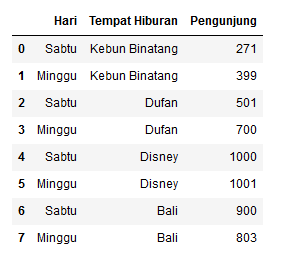

<h2>Quiz 5 : Pivoting and Aggregating</h2>

In [47]:
import pandas as pd

data = {
    'Tipe Ujian' : ['UTS1', 'UAS1']*3,
    'Mata Pelajaran' :['Statistika', 'Fisika', 'Fisika', 'Statistika', 'Fisika', 'Statistika'],
    'Jumlah Peserta' : [14, 17, 12, 16, 14, 13]
}
df = pd.DataFrame(data).set_index('Tipe Ujian')
df

Mata Pelajaran  Jumlah Peserta
Tipe Ujian                               
UTS1           Statistika              14
UAS1               Fisika              17
UTS1               Fisika              12
UAS1           Statistika              16
UTS1               Fisika              14
UAS1           Statistika              13

Perhatikan bahwa data jumlah peserta ujian untuk suatu tipe ujian dan mata pelajaran tertentu ada yang duplikat, ubahlah struktur data tersebut dan lakukan aggregasi berjenis jumlah sehingga sesuai dengan hasil yang di harapkan

Expected Result :

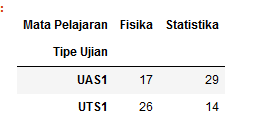

In [52]:
reshaped_data = df.pivot_table(values = 'Jumlah Peserta', index = 'Tipe Ujian', columns = 'Mata Pelajaran', aggfunc = sum)
reshaped_data

Mata Pelajaran  Fisika  Statistika
Tipe Ujian                        
UAS1                17          29
UTS1                26          14